In [1]:
import os
os.getcwd()

'C:\\Users\\hp\\Desktop\\Project'

# Importing Libraries

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics


# Importing the Dataset

In [3]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Visualization

In [4]:
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#viewing last 5 records
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [7]:
df.shape

(284807, 31)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
Rem_data = df[['Time','Amount', 'Class']]
Rem_data

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [10]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Data Visualization

Text(0, 0.5, 'Frequency')

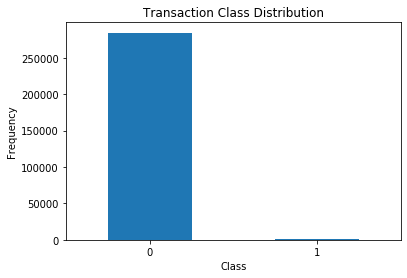

In [11]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [12]:
fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [13]:
normal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [16]:
#We have to analyze more amount of information from the transaction data i.e fraud data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#normal data
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

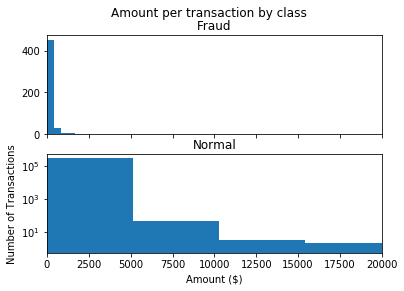

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 5
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

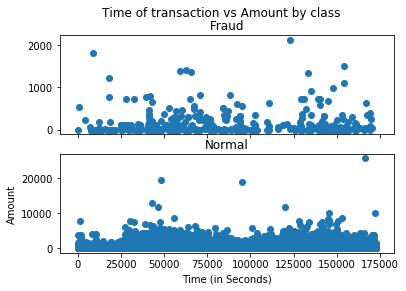

In [19]:
#here we are checking fraudulent transactions occur more often during certain time frame 
#visual representation
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

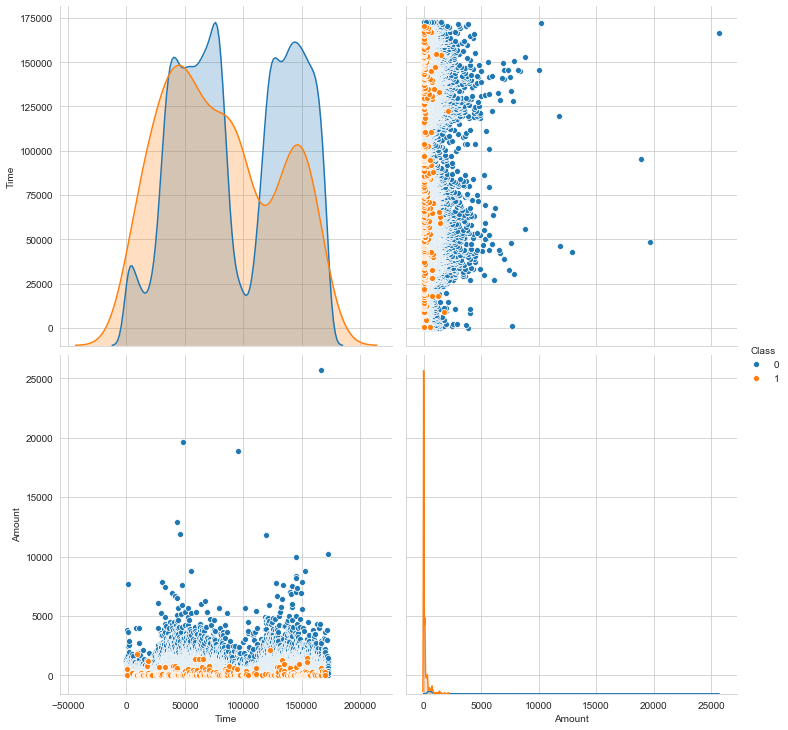

In [20]:
plt.close();
sn.set_style("whitegrid");
sn.pairplot(Rem_data, hue="Class", height=5);
plt.show()

In [21]:
print("Mean amount for normal transactions: ",np.mean(normal["Amount"]))
print("Mean amount for fraud transactions: ",np.mean(fraud["Amount"]))#for mean

Mean amount for normal transactions:  88.29102242225574
Mean amount for fraud transactions:  122.21132113821133


In [22]:
print("Std-Dev amount for normal transactions: ", np.std(normal["Amount"]))
print("Std-Dev amount for fraud transactions: ", np.std(fraud["Amount"]))#for standard deviation

Std-Dev amount for normal transactions:  250.1046523874637
Std-Dev amount for fraud transactions:  256.42229861324483


In [23]:
print("Median amount for normal  transactions: ", np.median(normal["Amount"]))
print("Median amount for fraud transactions: ", np.median(fraud["Amount"]))

Median amount for normal  transactions:  22.0
Median amount for fraud transactions:  9.25


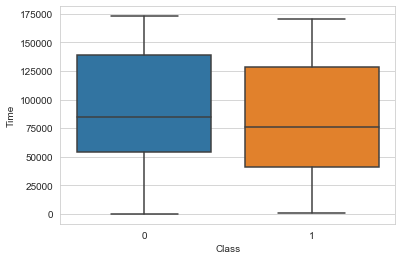

In [24]:
sn.boxplot(x = "Class", y = "Time", data = df)
plt.show()

# Taking care of Missing Data

In [25]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
#Get a count of missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [27]:
df.isnull().values.any()

False

# Lable Encoding and One Hot Encoding

In [28]:
#For doing Label Encoding our dataset does not contain any textual data, so here Label Encoding is not necessary.

In [29]:
#For doing One Hot Encoding our dataset does not contains any textual data, so here One Hot Encoding is not necessary.

# Splitting the dataset

In [30]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [31]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

In [32]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [33]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [35]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [36]:
y_train

161145    0
204520    0
182659    0
25117     0
227642    0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0
Name: Class, Length: 199364, dtype: int64

In [37]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208059,136954.0,-0.429070,0.712074,0.675855,-0.403577,0.668849,-0.413713,0.665961,0.099935,-0.379066,...,0.016809,-0.102000,-0.391487,-0.332563,-0.512572,0.746656,0.368231,-0.150931,-0.111220,29.95
260930,159780.0,-4.673996,-3.716208,-1.486611,0.829036,0.902701,-0.501887,2.994824,-1.188013,0.864683,...,-2.927002,-1.387099,0.414913,3.103269,0.642007,0.464011,0.027749,0.973848,-1.566714,533.05
75125,55911.0,-1.215390,1.379556,0.438732,1.394346,-0.377212,0.843496,-0.975098,-1.969737,-0.917814,...,0.659545,-1.230618,0.716991,0.107986,0.042642,-0.046630,-0.251591,0.234356,-0.035339,57.00
37292,38895.0,-0.632439,1.212284,1.388188,0.151509,-0.342824,-1.337771,0.648076,-0.046668,-0.103480,...,0.170883,-0.268740,-0.687707,0.082524,0.838322,-0.207461,0.046706,0.345269,0.168419,7.15


In [38]:
y_test

183484    0
255448    0
244749    0
63919     0
11475     0
         ..
208059    0
260930    0
75125     0
37292     0
240913    0
Name: Class, Length: 85443, dtype: int64

# Feature Scaling

In [39]:
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print ("\nOriginal data values(x) : \n",  x) 
print ("\nOriginal data values(y) : \n",  y) 
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print ("\nAfter min max Scaling(x) : \n", x_after_min_max_scaler) 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation(x) : \n", x_after_Standardisation)



Original data values(x) : 
 [[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]

Original data values(y) : 
 [0 0 0 ... 0 0 0]

After min max Scaling(x) : 
 [[0.00000000e+00 9.35192337e-01 7.66490419e-01 ... 4.18976135e-01
  3.12696634e-01 5.82379309e-03]
 [0.00000000e+00 9.78541955e-01 7.70066651e-01 ... 4.16345145e-01
  3.13422663e-01 1.04705276e-04]
 [5.78730497e-06 9.35217023e-01 7.53117667e-01 ... 4.1548926

# Training and Testing the model

In [40]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [41]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [42]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
92082,63767.0,1.054882,-0.324934,0.618467,0.978381,-0.810923,-0.336521,-0.244740,0.096921,0.839842,...,-0.164860,-0.026557,0.002314,-0.045244,0.431056,0.393395,0.447272,-0.020063,0.016526,59.98
3489,2985.0,1.315404,-0.033577,-1.089984,-0.557087,2.029931,3.268130,-0.534994,0.808250,-0.052724,...,0.016952,-0.313307,-1.068934,0.103797,0.992126,0.369398,0.110374,-0.028302,0.011836,1.98
138417,82643.0,-0.881402,1.160660,2.008705,3.074108,-0.505501,1.051633,-0.478933,0.914978,-0.828852,...,0.107801,0.271019,0.995122,-0.001237,0.122686,-0.459238,0.387255,0.341965,0.138365,18.88
282373,170855.0,0.156732,1.063919,-0.487379,-0.595187,1.048420,-0.694332,1.027485,-0.131451,-0.120848,...,0.071111,-0.346799,-0.827847,0.072384,0.384810,-0.371629,0.123378,0.224312,0.083687,7.70
166226,117937.0,-1.279417,0.489498,2.567455,-0.648927,0.318976,-0.422973,0.406417,-1.160163,0.240669,...,-0.260422,0.532338,-0.460917,-0.328863,0.532082,0.203416,-0.598270,-0.245991,-0.421908,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239038,149926.0,1.949500,-0.438093,-3.955000,-0.780820,3.072552,2.678698,0.485700,0.398037,-0.278265,...,0.035959,0.313389,0.751791,-0.216930,0.825182,0.618125,1.028563,-0.146045,-0.086809,102.95
136814,81878.0,-1.422251,-0.647252,1.284194,-0.545603,0.808279,1.158341,-0.056019,0.590788,-0.476355,...,0.044126,0.151387,0.327545,0.248251,-0.950815,-0.770320,1.449784,-0.096562,0.211965,121.74
60206,49208.0,-13.382360,2.702602,-4.756703,0.437122,-2.819559,-0.086388,1.806270,0.114334,6.928959,...,1.484760,-2.342313,0.081664,-1.181800,0.092452,1.642686,-0.259793,0.910701,4.927820,144.00
16186,27605.0,-1.253612,1.765533,0.350978,-0.109874,-0.414142,-0.596041,-0.131482,0.959358,-0.784326,...,0.043285,-0.179889,-0.677784,0.046271,-0.057760,-0.045877,0.084440,0.097220,0.019500,1.98


In [43]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
143366,85302.0,1.020519,-0.008170,0.370563,1.320877,-0.142373,0.157536,0.037601,0.115207,0.021352,...,-0.071182,-0.018046,0.031306,-0.121823,0.029392,0.614649,-0.335207,0.026416,0.014902,60.83
61117,49670.0,-2.059894,1.756400,0.881368,0.841371,-2.095140,0.007851,-1.543660,1.842245,-0.588353,...,-0.389904,0.308228,0.412831,0.132887,0.589148,-0.554213,0.326891,-0.733301,-0.125216,20.00
120671,75918.0,1.064723,-0.655005,0.683303,0.466085,-0.980335,0.013262,-0.557030,0.006096,-1.170174,...,-0.210729,-0.133965,-0.127190,-0.152086,-0.002973,0.392120,-0.311881,0.049463,0.046314,124.00
242991,151745.0,0.162504,1.132370,-0.465759,-0.605188,1.131055,-0.679739,1.072710,-0.177404,-0.244780,...,0.117207,-0.339143,-0.759924,0.055076,0.407823,-0.344947,0.120707,0.230810,0.085234,4.56
77301,56985.0,1.274881,0.405674,-0.973586,0.402749,0.788989,0.030053,0.130138,0.093506,-0.207597,...,-0.117183,-0.145739,-0.402808,-0.195659,-1.260040,0.594036,0.456324,-0.028668,0.009306,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2909.0,1.377221,-0.097817,-0.390029,-1.058216,-0.211071,-1.025096,0.097881,-0.231470,1.236482,...,-0.156471,-0.023537,0.042700,-0.235318,-0.457167,0.884210,-0.545961,0.033006,0.007299,1.00
98670,66760.0,1.067916,-0.887855,0.308925,-1.512336,-1.014914,-0.287164,-0.632011,0.265625,1.600338,...,-0.070786,0.008721,-0.190897,-0.019917,-0.333879,0.103065,-0.051937,0.000451,0.016830,88.94
19158,30055.0,1.226919,0.129031,0.151313,1.170102,-0.034012,0.038824,-0.058081,0.103487,0.253831,...,-0.212480,-0.140428,-0.273541,-0.168896,-0.367565,0.762278,-0.312737,0.012693,-0.001413,1.00
230146,146208.0,1.623233,-0.656654,-0.654986,0.996206,0.273691,1.614846,-0.652571,0.491694,0.609753,...,-0.067740,0.385715,1.115771,0.031278,-1.630759,-0.275910,-0.462479,0.084199,-0.037342,114.65


In [45]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
clf_cm_test = confusion_matrix(y_test,y_pred)
clf_cm_test

array([[85302,     1],
       [  131,     9]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 99.845511
Recall score : 6.428571
ROC score : 53.213700

[[85302     1]
 [  131     9]]


In [50]:
#probas = clf.predict_proba(X_test)

In [51]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

In [52]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [ ]:
clf_acc = cross_val_score(clf, X_train_std, y_train, cv=5, scoring="accuracy",  n_jobs=-1)

In [ ]:
clf_proba = cross_val_predict(clf, X_train_std, y_train, cv=5, method='predict_proba')
clf_scores = clf_proba[:, 1] 

In [ ]:
clf_acc

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_acc = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_std, y_train, cv=5, method='predict_proba')
lr_scores = lr_proba[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
lr_acc

array([0.99904697, 0.9987711 , 0.99887142, 0.99882126, 0.99889647])

In [52]:
y_pred=lr.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred))


Accuracy score: 99.920415
Recall score : 71.942446
ROC score : 85.954225

[[85275    29]
 [   39   100]]


# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
nb_classfier =GaussianNB()
nb_classfier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
nb_y_test = nb_classfier.predict(X_test)#for test
nb_y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
nb_y_train=nb_classfier.predict(X_train)#for train
nb_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix
nb_cm_test = confusion_matrix(y_test,nb_y_test)
nb_cm_test

array([[84696,   608],
       [   43,    96]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
nb_acc_test=accuracy_score(y_test, nb_y_test)
nb_acc_test

0.9923808855026158

In [59]:
nb_acc_train=accuracy_score(y_train, nb_y_train)  #train  
nb_acc_train

0.9923556910976906

In [60]:
from sklearn.metrics import precision_score

nb_precision_test =precision_score(y_test, nb_y_test, average='weighted')  
print(nb_precision_test)
nb_precision_train =precision_score(y_train, nb_y_train, average='weighted')
print(nb_precision_train)

0.9980884079629176
0.9978697496961934


#  support vector classification

In [61]:
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(X_train,y_train) 

In [62]:
svc_y_test = sc_classifier.predict(X_test)
print(svc_y_test)

[0 0 0 ... 0 0 0]


In [63]:
svc_y_train=sc_classifier.predict(X_train)  #train
print(svc_y_train)

[0 0 0 ... 0 0 0]


In [64]:
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(y_test,svc_y_test)   
svc_cm_test

array([[85304,     0],
       [  139,     0]], dtype=int64)

In [65]:
svc_cm_train =confusion_matrix(y_train, svc_y_train)
svc_cm_train

array([[199011,      0],
       [   353,      0]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(y_test, svc_y_test)  #for test  
svc_acc_test

0.9983731844621561

In [67]:
from sklearn.metrics import precision_score
sv_precision_test= precision_score(y_test, svc_y_test, average='weighted')  
print(sv_precision_test)
sv_precision_train=precision_score(y_train, svc_y_train, average='weighted')
print(sv_precision_train)

0.9967490154531062
0.9964618739220906


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,y_train)
#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, X_train_std, y_train, cv=5, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [69]:
dtc_y_test =dtc_clf.predict(X_test)
dtc_y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
dtc_y_train = dtc_clf.predict(X_train)
dtc_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(y_test, dtc_y_test)
dtc_cm_test

array([[85263,    41],
       [   27,   112]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
dtc_accu_test= accuracy_score(y_test,dtc_y_test)
dtc_accu_test

0.999204147794436

In [73]:
dtc_accu_train= accuracy_score(y_train,dtc_y_train)    
dtc_accu_train

1.0

In [74]:
from sklearn.metrics import precision_score

dtc_precision_test =precision_score(y_test, dtc_y_test, average='weighted')  
print(dtc_precision_test)
dtc_precision_train =precision_score(y_train, dtc_y_train, average='weighted')
print(dtc_precision_train)

0.9992480039564253
1.0


In [75]:
from sklearn.metrics import recall_score
dtc_recall_test=recall_score(y_test,dtc_y_test, average='weighted' )
print(dtc_recall_test)
dtc_recall_train=recall_score(y_train,dtc_y_train, average='weighted' )
print(dtc_recall_train)

0.999204147794436
1.0


# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=5, random_state=0)
rf_classi = rmf.fit(X_train, y_train)
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rf_classi, X_train_std, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rf_classi, X_train_std, y_train, cv=5, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [77]:
rf_y_test = rf_classi.predict(X_test)
rf_y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
rf_y_train = rf_classi.predict(X_train)
rf_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
from sklearn.metrics import confusion_matrix
rf_cm_test = confusion_matrix(y_test, rf_y_test)
rf_cm_test

array([[85297,     7],
       [   33,   106]], dtype=int64)

In [80]:
rf_cm_train = confusion_matrix(y_train, rf_y_train)
rf_cm_train

array([[199000,     11],
       [    85,    268]], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score
rf_accu_test= accuracy_score(y_test,rf_y_test)  
rf_accu_test

0.9995318516437859

In [82]:
rf_accu_train= accuracy_score(y_train,rf_y_train)  
rf_accu_train

0.9995184687305632

In [83]:
from sklearn.metrics import precision_score
rf_precision_test =precision_score(y_test, rf_y_test, average='weighted')  
print(rf_precision_test)  #test data
rf_precision_train =precision_score(y_train, rf_y_train, average='weighted')
print(rf_precision_train) #train data

0.9995131191040958
0.9995039928563886


In [84]:
from sklearn.metrics import recall_score
rf_recall_test=recall_score(y_test,rf_y_test, average='weighted' )
print(rf_recall_test)
rf_recall_train=recall_score(y_train,rf_y_train, average='weighted' )
print(rf_recall_train)

0.9995318516437859
0.9995184687305632


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Evaluation

ROC AUC Score: 0.9126958605614447
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.73      0.64      0.68       147

    accuracy                           1.00     85443
   macro avg       0.87      0.82      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85262    34]
 [   53    94]]


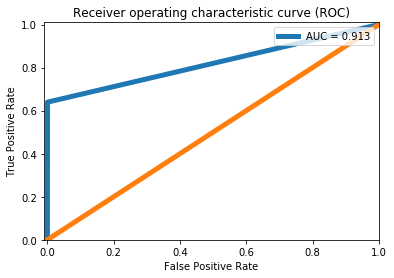

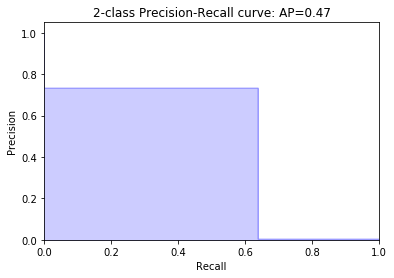

In [88]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

Accuracy score= 99.82% which is higher than the baseline 99.81%.
Precision = 94/(34+94) = 0.73. The rate of true positive in all positive cases.
Recall = 94/ (53+94) = 0.63. The rate of true positive in all true cases.
##F1-score = 0.68
False positives cases = 34.